# Hyperparameter Tuning


In [1]:
from data import load_data

train_data, test_data = load_data()

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib
import os
import numpy as np


def tune(p_num, tuner, X, y):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Skipping...')
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X, y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.03821407648646899),
             ('max_depth', 15),
             ('min_child_weight', 1),
             ('n_estimators', 760),
             ('scale_pos_weight', 100),
             ('subsample', 0.712000621857815)])

RMSE: 0.004124505095994921
RMSE: 0.004124505095994921
R2 Score: 0.999894206891188


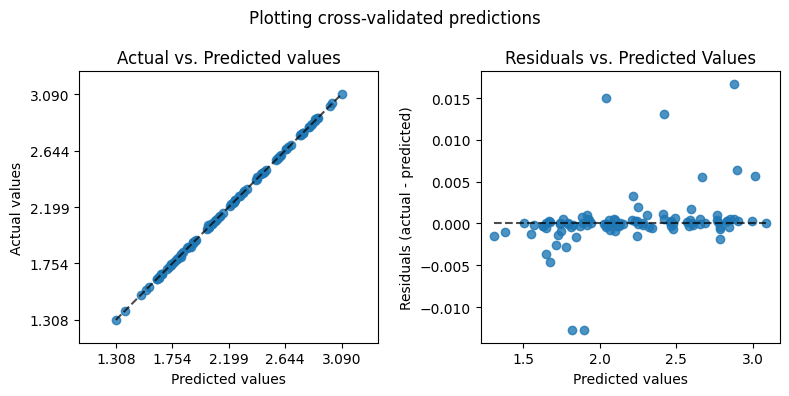

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.6300141959663236e-09),
             ('colsample_bytree', 0.38155594112837643),
             ('gamma', 0),
             ('lambda', 1e-10),
             ('learning_rate', 0.05891679694522603),
             ('max_depth', 15),
             ('min_child_weight', 10),
             ('n_estimators', 548),
             ('scale_pos_weight', 1),
             ('subsample', 0.7812177521524054)])

RMSE: 0.009145013170374933
RMSE: 0.009145013170374933
R2 Score: 0.9989826030354197


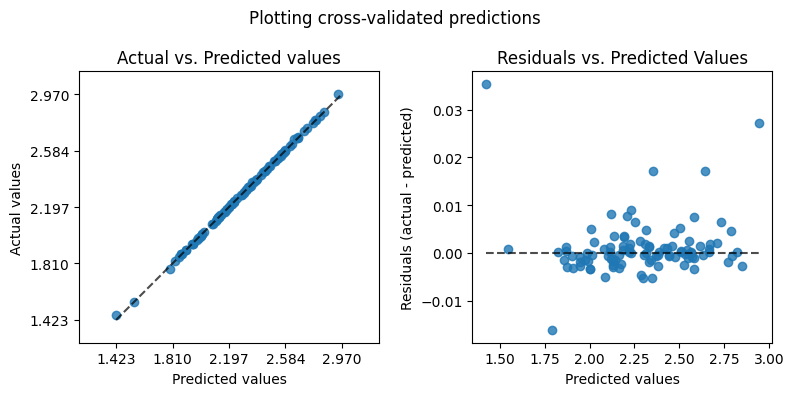

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.0486289617520577e-08),
             ('colsample_bytree', 1.0),
             ('gamma', 0),
             ('lambda', 9.049579496798956e-08),
             ('learning_rate', 0.043804677323746655),
             ('max_depth', 15),
             ('min_child_weight', 4),
             ('n_estimators', 823),
             ('scale_pos_weight', 100),
             ('subsample', 0.5)])

RMSE: 0.001903613780318831
RMSE: 0.001903613780318831
R2 Score: 0.9999452150501151


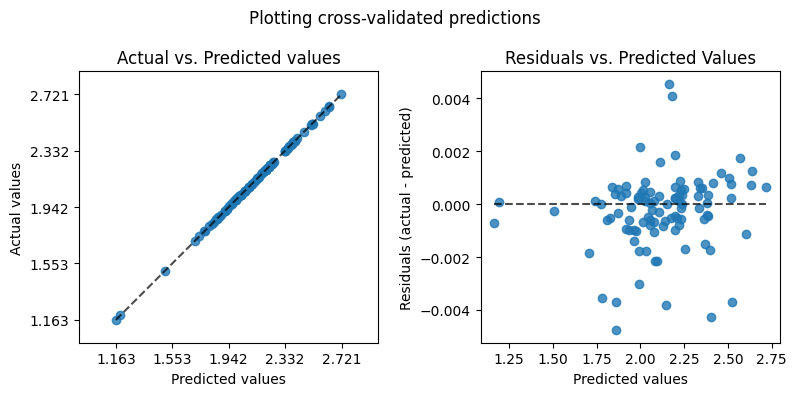

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.3389680116613002e-09),
             ('colsample_bytree', 0.4274673822783835),
             ('gamma', 0),
             ('lambda', 1.199456796572279e-05),
             ('learning_rate', 0.03744472379011477),
             ('max_depth', 14),
             ('min_child_weight', 2),
             ('n_estimators', 870),
             ('scale_pos_weight', 100),
             ('subsample', 0.6454619044579007)])

RMSE: 0.0006067634113755012
RMSE: 0.0006067634113755012
R2 Score: 0.9999968146302993


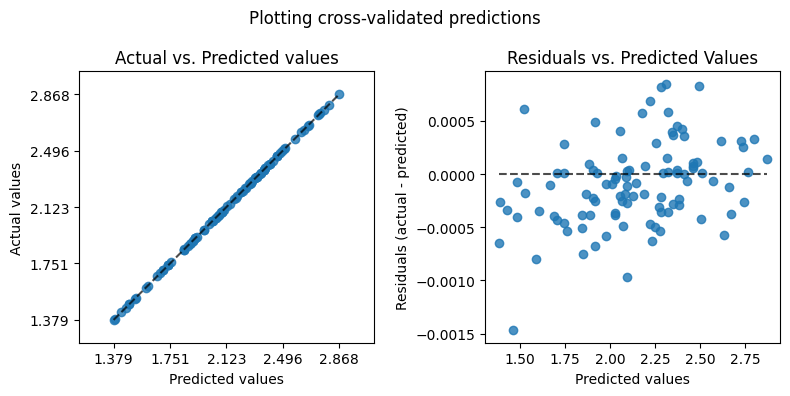

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 8.014160065984683e-07),
             ('colsample_bytree', 0.5974515831259846),
             ('gamma', 0),
             ('lambda', 5.979932881748438),
             ('learning_rate', 0.052702393290790586),
             ('max_depth', 10),
             ('min_child_weight', 2),
             ('n_estimators', 925),
             ('scale_pos_weight', 96),
             ('subsample', 0.5207061484774737)])

RMSE: 0.016784741076752853
RMSE: 0.016784741076752853
R2 Score: 0.9979236548236178


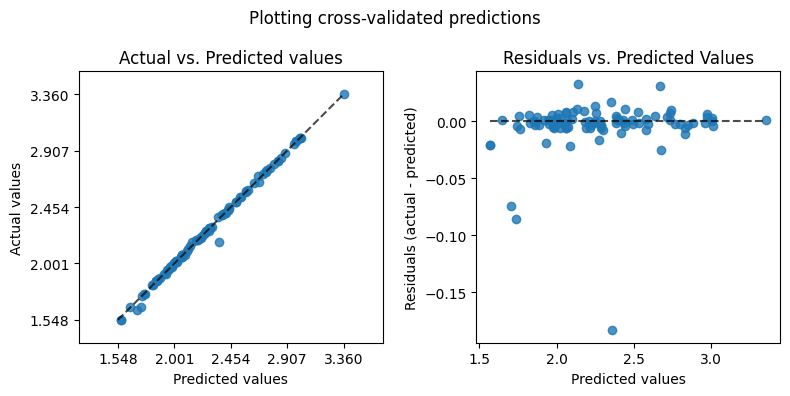

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.6379005278859053),
             ('gamma', 0),
             ('lambda', 0.014887093922731975),
             ('learning_rate', 0.08236700510892321),
             ('max_depth', 6),
             ('min_child_weight', 1),
             ('n_estimators', 1000),
             ('scale_pos_weight', 100),
             ('subsample', 0.5949190058636392)])

RMSE: 0.05263172129948841
RMSE: 0.05263172129948841
R2 Score: 0.9389914367504714


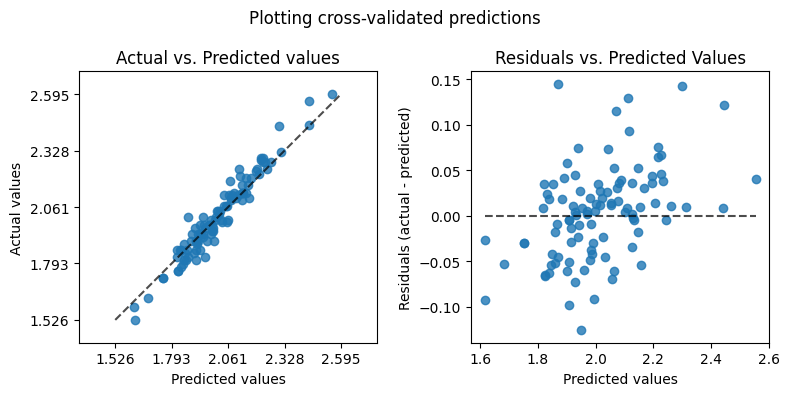

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.6403055893393153),
             ('gamma', 0),
             ('lambda', 0.11878997789511335),
             ('learning_rate', 0.03834140315905764),
             ('max_depth', 11),
             ('min_child_weight', 8),
             ('n_estimators', 1000),
             ('scale_pos_weight', 100),
             ('subsample', 1.0)])

RMSE: 0.026536189953216202
RMSE: 0.026536189953216202
R2 Score: 0.9911287295776396


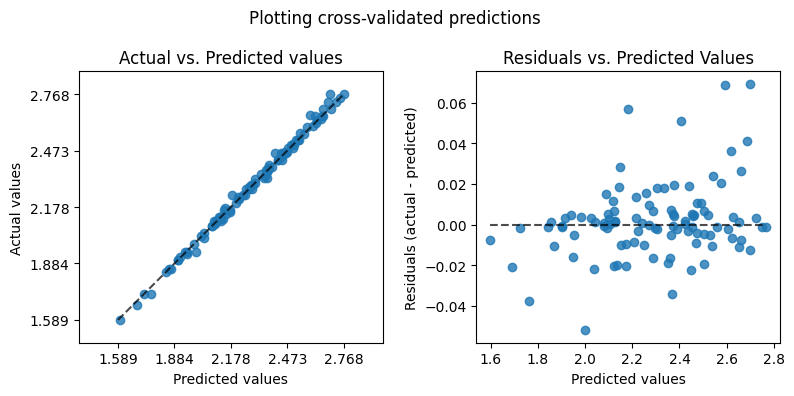

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 1e-10),
             ('learning_rate', 0.013250021586976758),
             ('max_depth', 15),
             ('min_child_weight', 1),
             ('n_estimators', 633),
             ('scale_pos_weight', 100),
             ('subsample', 1.0)])

RMSE: 0.007361141433829653
RMSE: 0.007361141433829653
R2 Score: 0.9993880934296909


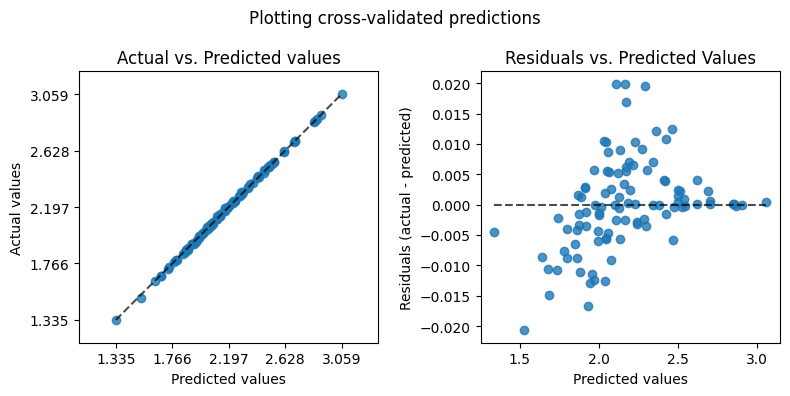

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 7.763401895078837e-06),
             ('colsample_bytree', 0.660077084269227),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.07303631685122645),
             ('max_depth', 10),
             ('min_child_weight', 3),
             ('n_estimators', 919),
             ('scale_pos_weight', 67),
             ('subsample', 0.5079448635246375)])

RMSE: 0.0076978797873862295
RMSE: 0.0076978797873862295
R2 Score: 0.9993480373926545


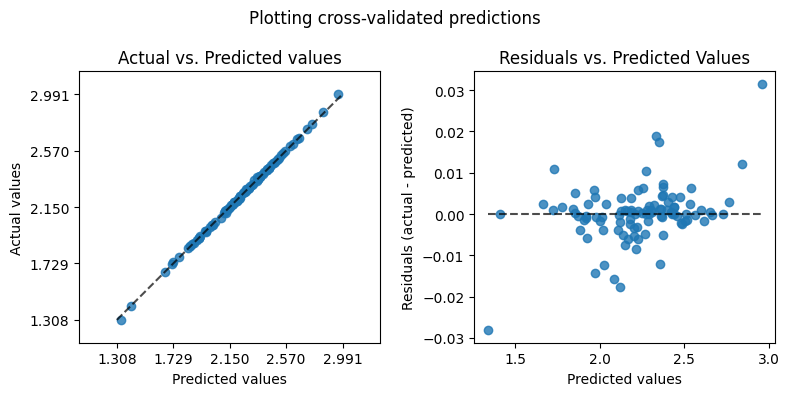

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1.5252784836217214e-09),
             ('colsample_bytree', 0.6179660692925781),
             ('gamma', 0),
             ('lambda', 3.996276335573272),
             ('learning_rate', 0.01494838445919069),
             ('max_depth', 14),
             ('min_child_weight', 8),
             ('n_estimators', 731),
             ('scale_pos_weight', 13),
             ('subsample', 0.8158197299326054)])

RMSE: 0.012613853832678634
RMSE: 0.012613853832678634
R2 Score: 0.9962027654945834


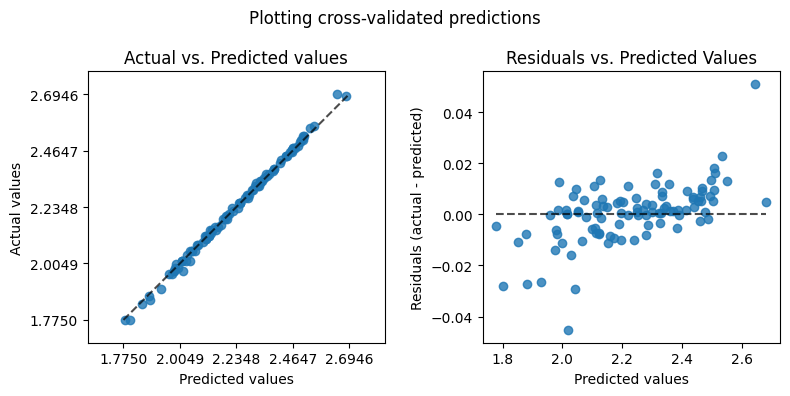

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 1e-10),
             ('learning_rate', 0.06000667863566946),
             ('max_depth', 15),
             ('min_child_weight', 10),
             ('n_estimators', 1000),
             ('scale_pos_weight', 76),
             ('subsample', 0.5)])

RMSE: 0.0028793174202282916
RMSE: 0.0028793174202282916
R2 Score: 0.9999356017225841


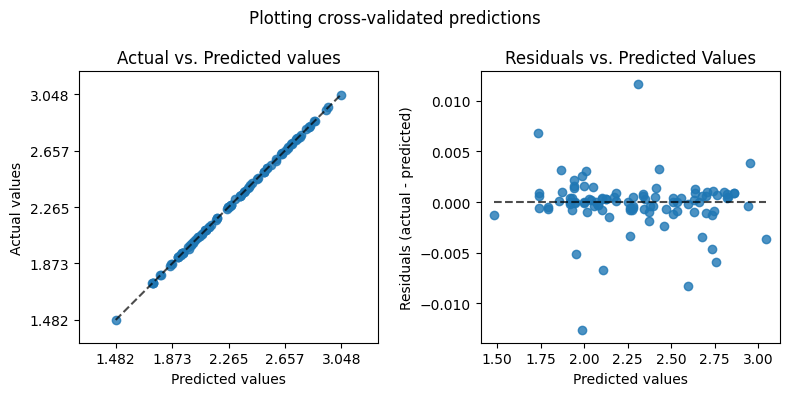

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.371264350889959),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.04388505006793742),
             ('max_depth', 9),
             ('min_child_weight', 1),
             ('n_estimators', 866),
             ('scale_pos_weight', 100),
             ('subsample', 1.0)])

RMSE: 0.011299473281079074
RMSE: 0.011299473281079074
R2 Score: 0.9983196308594813


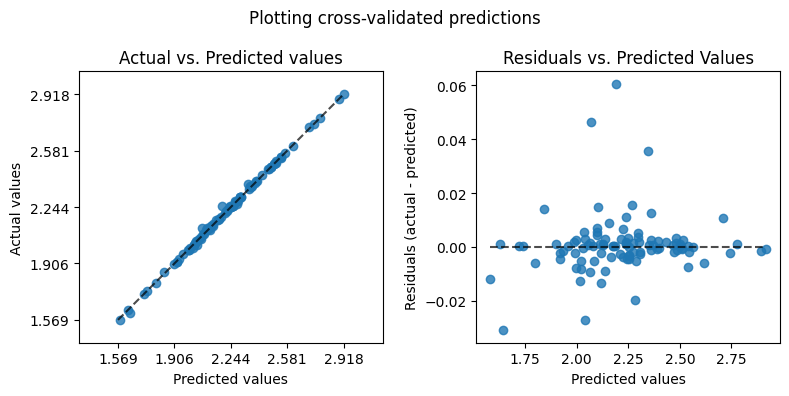

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 0.013901105695016513),
             ('learning_rate', 0.03784714596018232),
             ('max_depth', 15),
             ('min_child_weight', 10),
             ('n_estimators', 1000),
             ('scale_pos_weight', 21),
             ('subsample', 0.9397141283681897)])

RMSE: 0.0035869005384802544
RMSE: 0.0035869005384802544
R2 Score: 0.9999007180589365


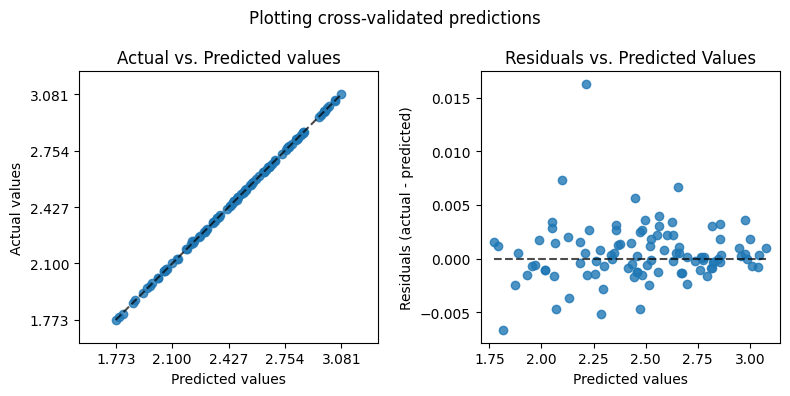

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 3.84324155296432e-08),
             ('colsample_bytree', 0.3),
             ('gamma', 0),
             ('lambda', 10.0),
             ('learning_rate', 0.028189815609790312),
             ('max_depth', 13),
             ('min_child_weight', 5),
             ('n_estimators', 1000),
             ('scale_pos_weight', 1),
             ('subsample', 0.7695141957948638)])

RMSE: 0.0067000661526936105
RMSE: 0.0067000661526936105
R2 Score: 0.9995206350792494


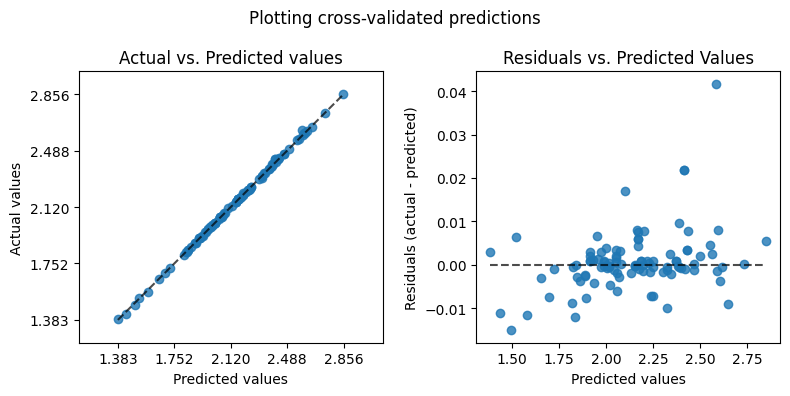

-----------XGBRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('alpha', 1e-10),
             ('colsample_bytree', 0.8434874359952509),
             ('gamma', 0),
             ('lambda', 1.2976936270166251e-08),
             ('learning_rate', 0.07011842074536714),
             ('max_depth', 8),
             ('min_child_weight', 10),
             ('n_estimators', 1000),
             ('scale_pos_weight', 1),
             ('subsample', 0.7119693252754504)])

RMSE: 0.0032634488110188224
RMSE: 0.0032634488110188224
R2 Score: 0.9998439019878391


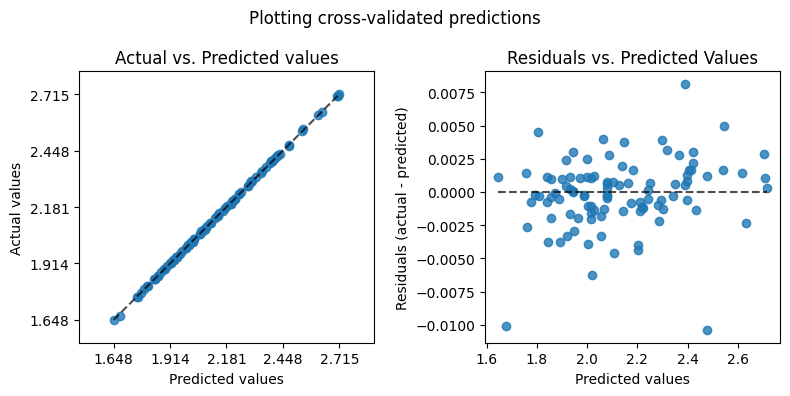

In [3]:
from pipelines import pipeline
from src.features.tuners import XGBHyperparameterTuner

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']
    y_train_log = np.log1p(y_train)

    tune(patient, XGBHyperparameterTuner(search_space='deep'), X_train, y_train_log)